In [2]:
!pip install yfinance

In [28]:
import yfinance as yf  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
def get_ticker_data(ticker, start, end, interval):
    
    # import libaries
    import yfinance as yf  
    import matplotlib.pyplot as plt
    import pandas as pd
    
    # download data using yfinance libary
    df = yf.download(tickers=ticker,start=start,end=end,interval=interval)
    
    # add in column showing price % change from start date 
    df['Percent_Change'] = [(df['Close'][i] - df['Open'][i]) / df['Open'][i] * 100 for i in range(len(df['Open']))]
    df['Change_Close_Less_Open'] = [df['Close'][i] - df['Open'][i] for i in range(len(df['Open']))]
    return df

In [32]:
df_btc = get_ticker_data(ticker='BTC-USD',start='2020-01-01',end='2021-04-30',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [33]:
df_doge = get_ticker_data(ticker='DOGE-USD',start='2020-01-01',end='2021-04-30',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [34]:
df_combined = df_doge.join(df_btc, how='inner', lsuffix='_doge', rsuffix='_btc')

The correlation is 0.01 with R-square value of 0.0


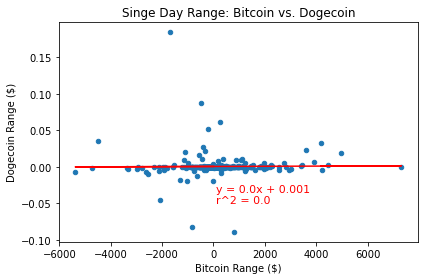

In [35]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

btc = df_combined['Change_Close_Less_Open_btc']
doge = df_combined['Change_Close_Less_Open_doge']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(btc, doge)
regress_values = btc * slope + intercept
regress_eq = (f'''y = {str(round(slope, 3))}x + {str(round(intercept, 3))}
r^2 = {round(rvalue**2,3)}''')

# format plot
fig, ax = plt.subplots()
df_combined.plot(kind='scatter', 
                 ax=ax, 
                 x='Change_Close_Less_Open_btc', 
                 y='Change_Close_Less_Open_doge'
                )

# plot trend linear regression line and annotate

ax.plot(btc, regress_values, color = 'r')
ax.annotate(regress_eq, (100,-0.05), color = 'r', fontsize=11)

ax.set(title='Singe Day Range: Bitcoin vs. Dogecoin',
       xlabel = 'Bitcoin Range ($)',
       ylabel = 'Dogecoin Range ($)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(btc, doge)

print(f'The correlation is {round(correlation[0], 2)} with R-square value of {round(rvalue**2,3)}')

The correlation is 0.28 with R-square value of 0.081


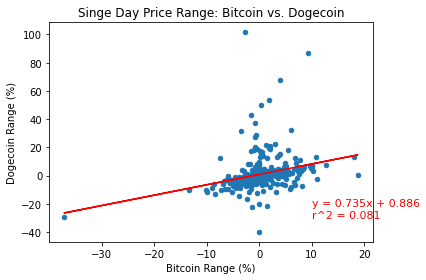

In [36]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

btc = df_combined['Percent_Change_btc']
doge = df_combined['Percent_Change_doge']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(btc, doge)
regress_values = btc * slope + intercept
regress_eq = (f'''y = {str(round(slope, 3))}x + {str(round(intercept, 3))}
r^2 = {round(rvalue**2,3)}''')

# format plot
fig, ax = plt.subplots()
df_combined.plot(kind='scatter', 
                             ax=ax, 
                             x='Percent_Change_btc', 
                             y='Percent_Change_doge'
                            )

# plot trend linear regression line and annotate

ax.plot(btc, regress_values, color = 'r')
ax.annotate(regress_eq, (10,-30), color = 'r', fontsize=11)

ax.set(title='Singe Day Price Range: Bitcoin vs. Dogecoin',
       xlabel = 'Bitcoin Range (%)',
       ylabel = 'Dogecoin Range (%)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(btc, doge)

print(f'The correlation is {round(correlation[0], 2)} with R-square value of {round(rvalue**2,3)}')

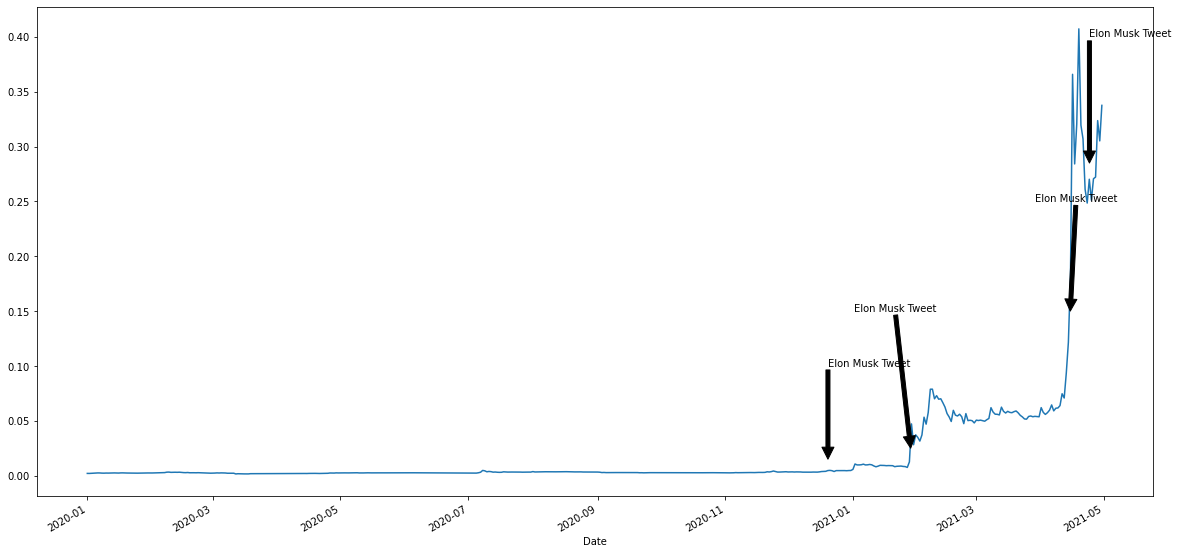

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
df_doge['Close'].plot(ax=ax)
ax.annotate('Elon Musk Tweet', 
            xy=(pd.Timestamp('2021-04-14 21:33:00+0000', tz='US/Pacific'), .15), 
            xytext=(pd.Timestamp('2021-03-28 21:33:00+0000', tz='US/Pacific'), .25), 
            arrowprops=dict(facecolor='black', shrink=1))
ax.annotate('Elon Musk Tweet', 
            xy=(pd.Timestamp('2020-12-20 01:30:00+0000', tz='US/Pacific'), .015), 
            xytext=(pd.Timestamp('2020-12-20 01:30:00+0000', tz='US/Pacific'), .1), 
            arrowprops=dict(facecolor='black', shrink=1))
ax.annotate('Elon Musk Tweet', 
            xy=(pd.Timestamp('2021-04-24 01:54:00+0000', tz='US/Pacific'), .285), 
            xytext=(pd.Timestamp('2021-04-24 01:30:00+0000', tz='US/Pacific'), .4), 
            arrowprops=dict(facecolor='black', shrink=1));
ax.annotate('Elon Musk Tweet', 
            xy=(pd.Timestamp('2021-01-28 14:47:00+0000', tz='US/Pacific'), .025), 
            xytext=(pd.Timestamp('2021-01-01 14:47:00+0000', tz='US/Pacific'), .15), 
            arrowprops=dict(facecolor='black', shrink=1));